# 1. Exploratory Data Analysis

### Import Libraries and Dataset

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from fancyimpute import IterativeImputer
from skopt import BayesSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data from the excel file
description = pd.read_excel('dataset/E-Commerce.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
df = pd.read_excel('dataset/E-Commerce.xlsx', sheet_name='E Comm')
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [3]:
# Check data types for each columns
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [4]:
# Remove CustomerID column 
df.drop(columns='CustomerID', inplace=True)
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
# Data dimension
df.shape

(5630, 19)

In [6]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [7]:
# Check duplicate rows
duplicate_rows = df.duplicated().sum()
print('Of the entire rows, have been found {} rows duplicated data'. format(duplicate_rows))

Of the entire rows, have been found 556 rows duplicated data


In [8]:
#Print summary statistics of the data including the categorical columns
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Define Numerical Columns and Categorical Columns

In [9]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 14 numerical columns : ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

We have 5 categorical columns : ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


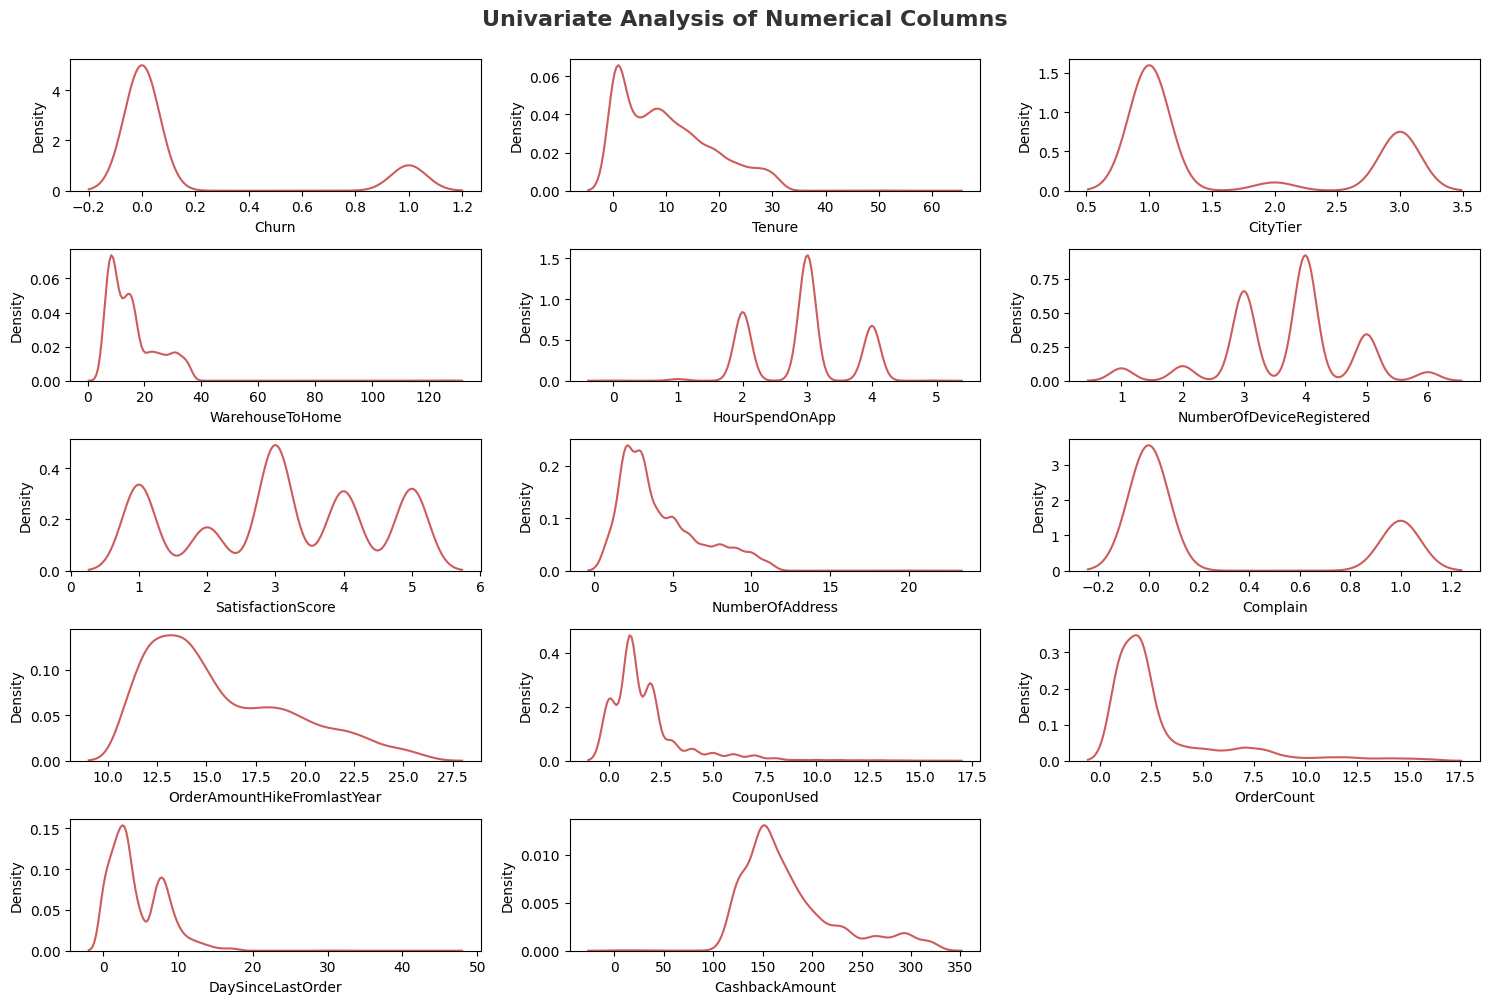

In [10]:
# Numerical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='indianred')
    plt.xlabel(num_cols[i])
    plt.tight_layout()
    
# # Save plot
# plt.savefig('img/num_univariative.png')


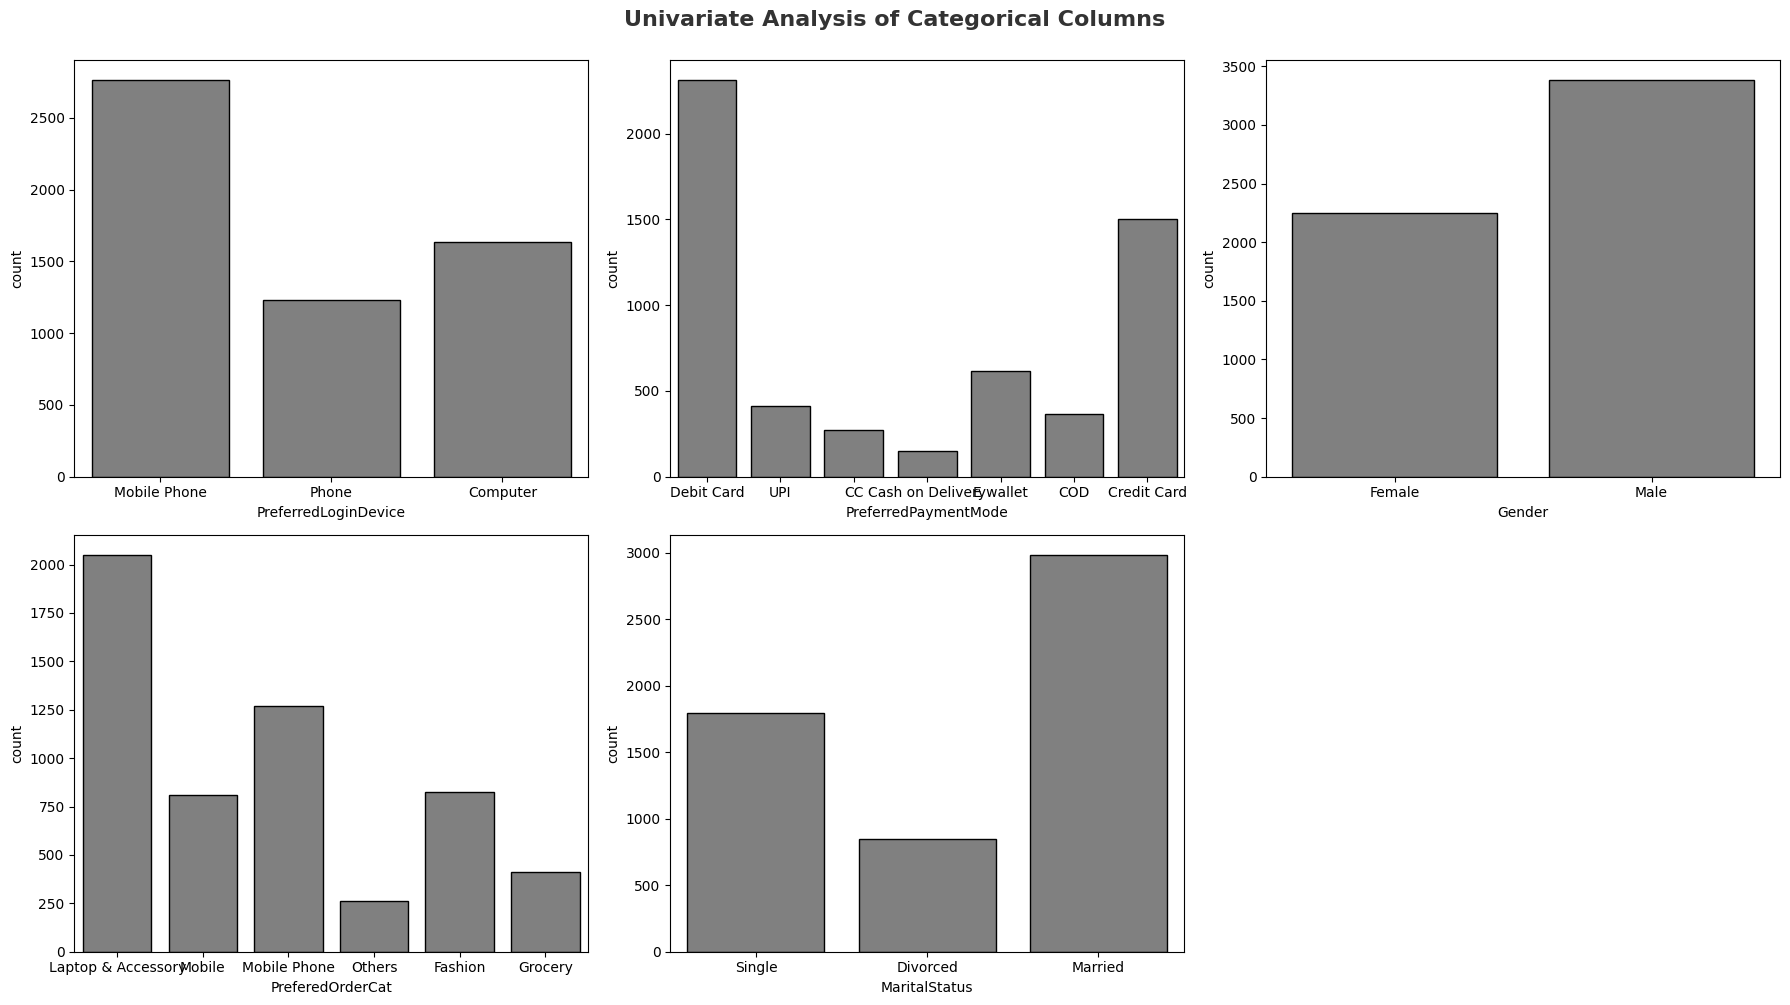

In [11]:
# Categorical columns
plt.figure(figsize=(18, 10))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cat_cols[i]], color='grey', edgecolor='black')
    plt.tight_layout()
    
# Save plot
plt.savefig('img/cat_univariate.png')

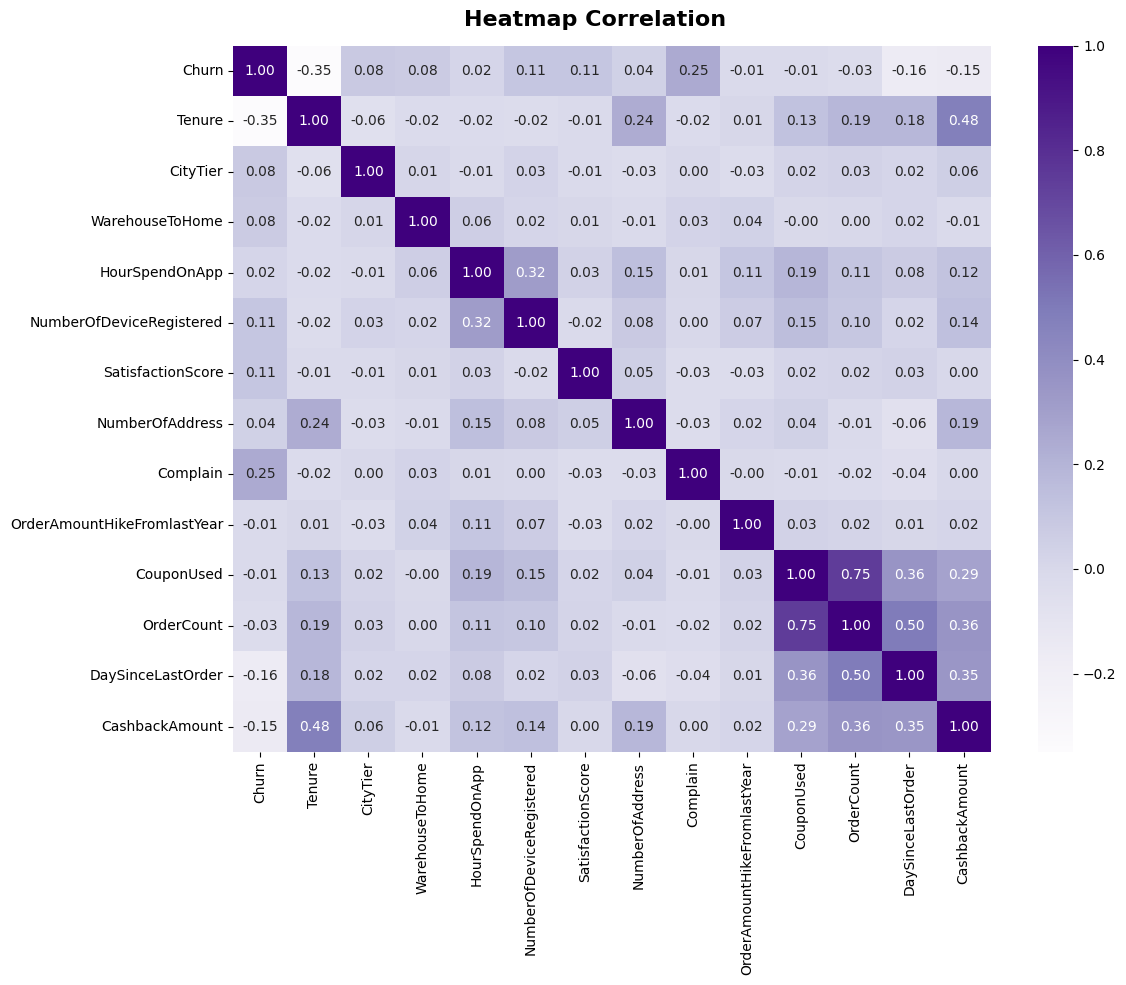

In [12]:
# Heatmap Correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Purples')
plt.suptitle('Heatmap Correlation', color='black', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Save plot
plt.savefig('img/heatmap.png')

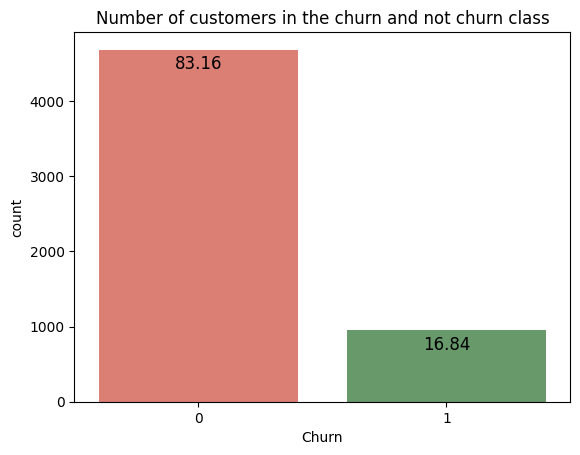

<Figure size 640x480 with 0 Axes>

In [16]:
#Count the number of customers in the churn and not churn class
clr = ['#EC7063', '#5FA164']

ax = sns.countplot(x='Churn', data=df, palette=clr)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.set_title('Number of customers in the churn and not churn class', fontsize=12)
plt.show()

# Save plot
plt.savefig('img/churnrate.png')

In [17]:
# Check proportion target
prop_target = df['Churn'].value_counts(normalize=True) * 100
print('Percentage of customer not churn {}%'.format(round(prop_target[0], 1)))
print('Percentage of customer churn {}%'.format(round(prop_target[1], 1)))

Percentage of customer not churn 83.2%
Percentage of customer churn 16.8%


There are more retained than churned customers, the ratio of retained to churned is approximately 5 to 1, so the churn rate is very low, which is normal therefore making the data imbalanced.

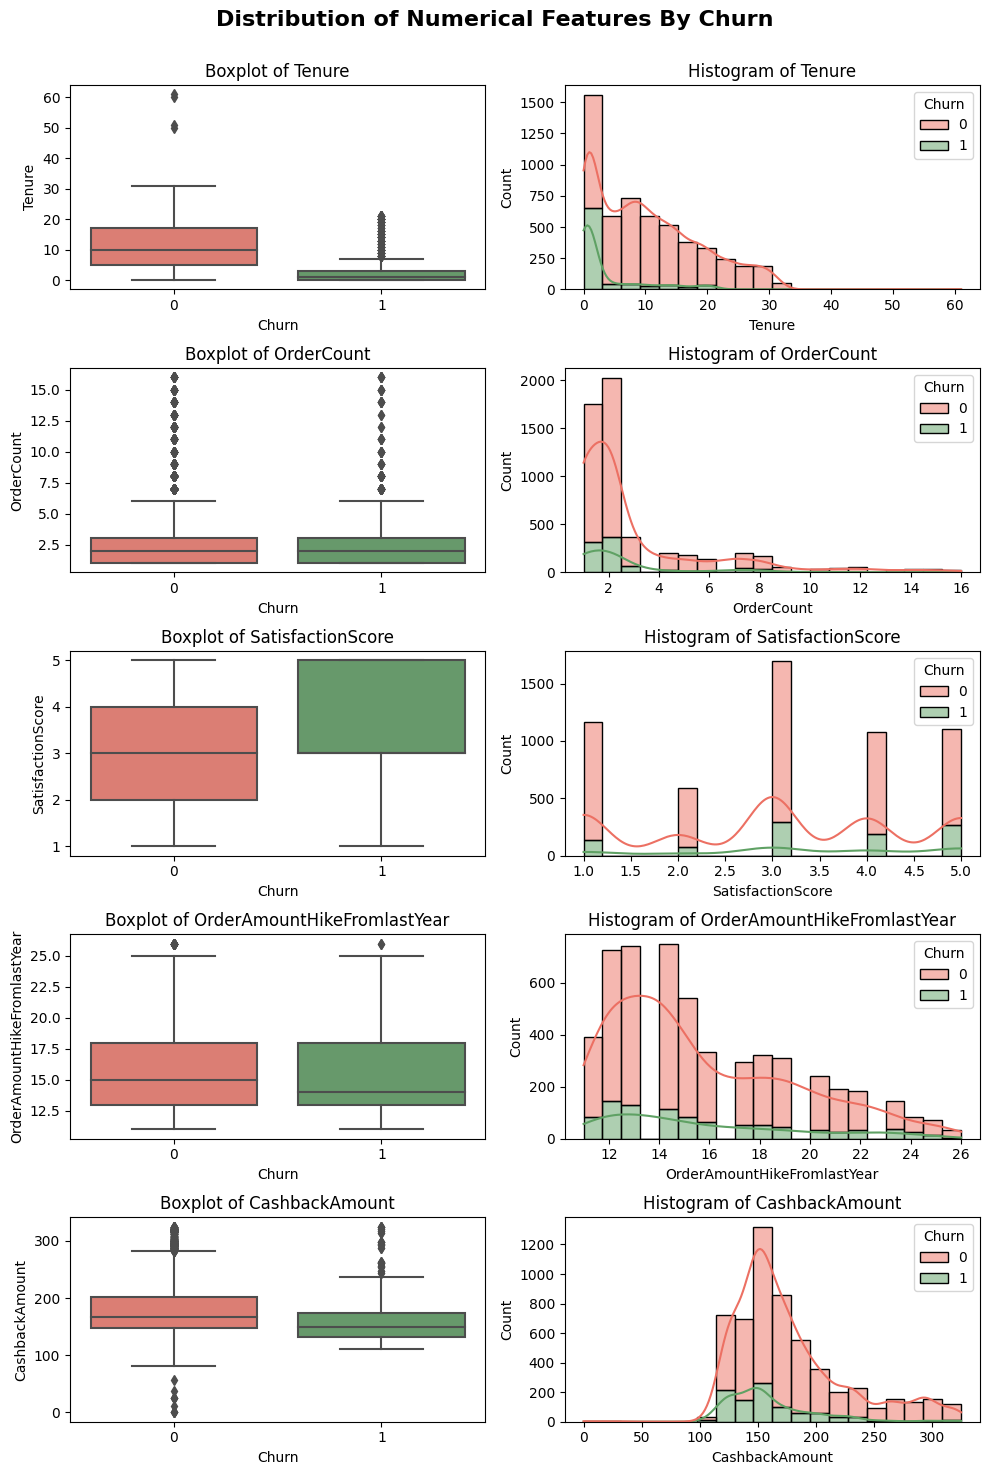

In [18]:
# EDA Numerical Features by Target (Churn)
num_cols2 = ['Tenure', 'OrderCount', 'SatisfactionScore', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
clr = ['#EC7063', '#5FA164']
fig, ax = plt.subplots(5, 2, figsize=(10,15))
fig.suptitle('Distribution of Numerical Features By Churn', color='black',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(num_cols2):   
    sns.boxplot(data=df, x='Churn', y=col,  palette=clr, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Churn', bins=20, kde=True, 
                 multiple='stack', palette=clr, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

# Save plot
plt.savefig('img/num_multivariate.png')

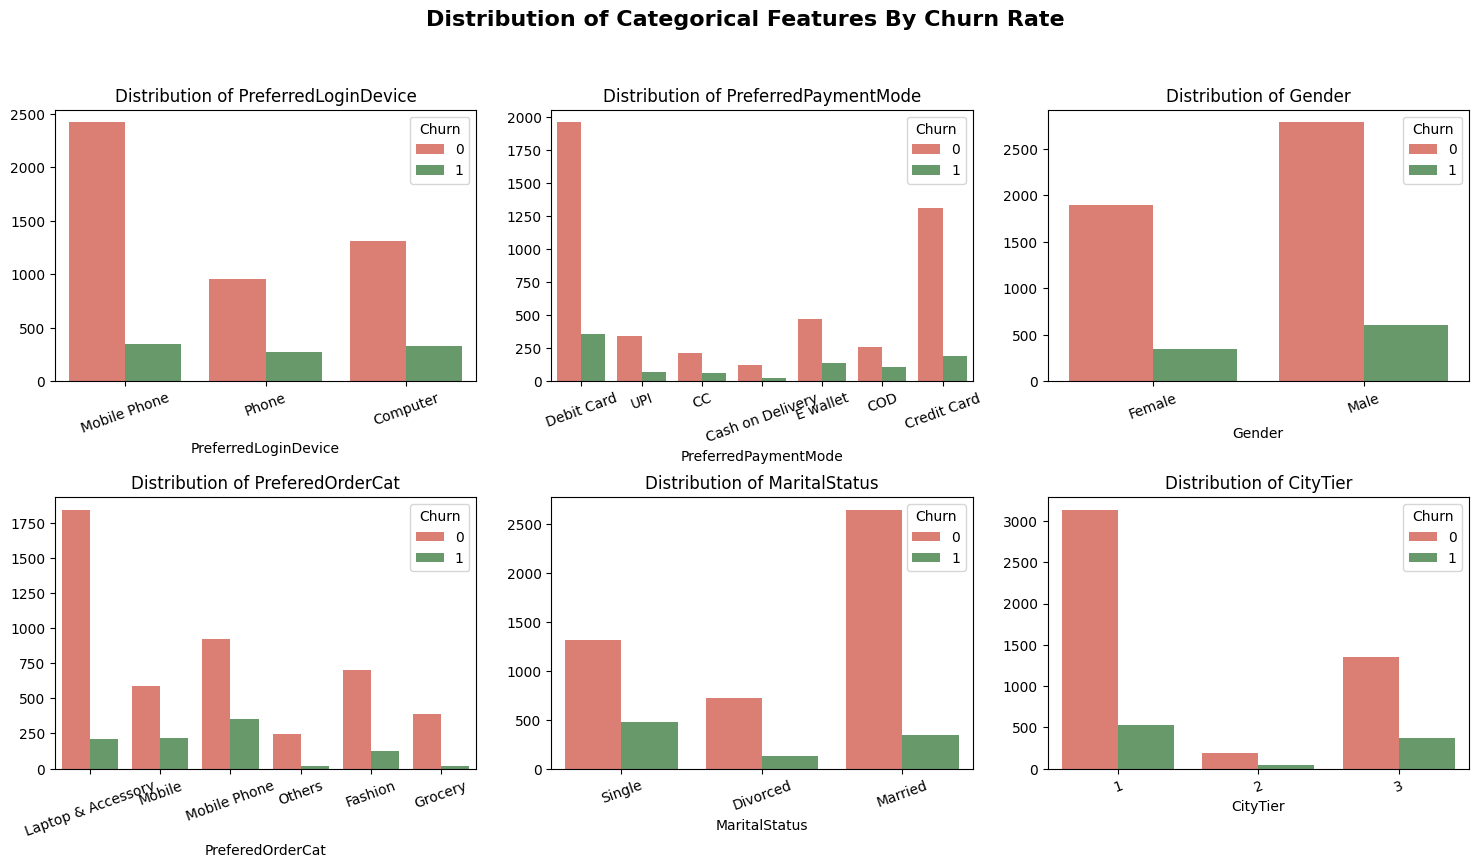

In [19]:
# EDA Categorical Features by Target (Churn)
cat_cols2 = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'CityTier']
clr = ['#EC7063', '#5FA164']
fig, axes = plt.subplots(5, 3, figsize=(15,20))
fig.suptitle('Distribution of Categorical Features By Churn Rate', color='black',
             fontsize=16, fontweight='bold')
for ax, col in zip(axes.flatten(), df[cat_cols2].columns):
    sns.countplot(data=df, x=col, hue='Churn', palette=clr, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
    ax.set_ylabel('')
axes[4,2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)

[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

# Save plot
plt.savefig('img/cat_multivariate_analysis.png')

In [ ]:
# check correlation categorical columns to target
# H0 (Fail to Reject Null) : Categorical columns does not have correlation with target (Churn)
# H1 (Reject Null): Categorical columns have correlation with target (Churn)

from scipy.stats import chi2_contingency
chi2_check = []
for i in cat_cols:
    if chi2_contingency(pd.crosstab(df['Churn'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result

## EDA Conclusion